In [2]:
!pip install minerl

import minerl as ml
import gym
import numpy as np 
import logging
from matplotlib import pyplot as plt 

#logging.basicConfig(level = logging.DEBUG)
logging.basicConfig(level = logging.FATAL)
# Downloading One of the MineCraft environment. This is the one for this competetion.
# around 3.17G
#ml.data.download('/Users/codetracer/mine_rl/data/experiment', experiment='MineRLObtainDiamond-v0')
ml.data.download('mine_rl/data/experiment', experiment='MineRLObtainDiamond-v0')

'mine_rl/data/experiment'

In [3]:
# create environment
env = gym.make('MineRLNavigateDense-v0')

EOFError: 
FAILURE: Build failed with an exception.

* What went wrong:
Could not determine java version from '12.0.2'.

* Try:
Run with --info or --debug option to get more log output.

* Exception is:
java.lang.IllegalArgumentException: Could not determine java version from '12.0.2'.
	at org.gradle.api.JavaVersion.toVersion(JavaVersion.java:68)
	at org.gradle.api.JavaVersion.current(JavaVersion.java:78)
	at org.gradle.launcher.cli.JavaRuntimeValidationAction.execute(JavaRuntimeValidationAction.java:32)
	at org.gradle.launcher.cli.JavaRuntimeValidationAction.execute(JavaRuntimeValidationAction.java:24)
	at org.gradle.launcher.cli.ExceptionReportingAction.execute(ExceptionReportingAction.java:33)
	at org.gradle.launcher.cli.ExceptionReportingAction.execute(ExceptionReportingAction.java:22)
	at org.gradle.launcher.cli.CommandLineActionFactory$WithLogging.execute(CommandLineActionFactory.java:205)
	at org.gradle.launcher.cli.CommandLineActionFactory$WithLogging.execute(CommandLineActionFactory.java:169)
	at org.gradle.launcher.Main.doAction(Main.java:33)
	at org.gradle.launcher.bootstrap.EntryPoint.run(EntryPoint.java:45)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:567)
	at org.gradle.launcher.bootstrap.ProcessBootstrap.runNoExit(ProcessBootstrap.java:55)
	at org.gradle.launcher.bootstrap.ProcessBootstrap.run(ProcessBootstrap.java:36)
	at org.gradle.launcher.GradleMain.main(GradleMain.java:23)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:567)
	at org.gradle.wrapper.BootstrapMainStarter.start(BootstrapMainStarter.java:30)
	at org.gradle.wrapper.WrapperExecutor.execute(WrapperExecutor.java:127)
	at org.gradle.wrapper.GradleWrapperMain.main(GradleWrapperMain.java:61)



Minecraft process finished unexpectedly. There was an error with Malmo.

### 1 Random Navigation Agent

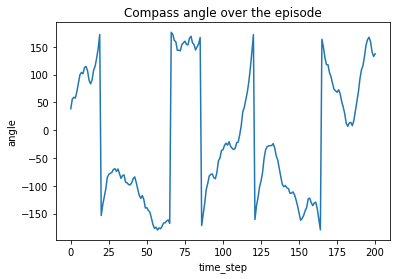

In [0]:

# start game
env = gym.make('MineRLNavigateDense-v0')
obs = env.reset()
# obs : (three observations)
#    1. pov: an RGB image of the agent's first person perspective
#    2. compassAngle: a float giving the angle of the agent to its target.
#    3. inventory: a dictionary containing the amount of 'dirt' blocks in the agent's inventory.

angles = []
done = False
while not done:
    action = env.action_space.sample()
    if action is None or len(angles) > 200:
        break
    obs, reward, done, _ = env.step(action)
    
    angles.append(obs["compassAngle"])
    
time_step = np.arange(0, len(angles))
plt.title("Compass angle over the episode") 
plt.xlabel("time_step") 
plt.ylabel("angle") 
plt.plot(time_step, angles) 
plt.show()

### 2 No-op actions Navigation Agent

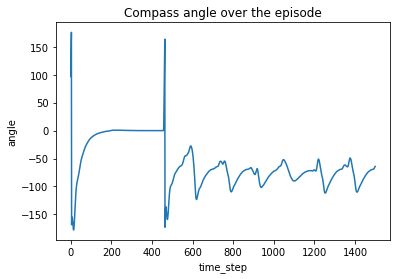

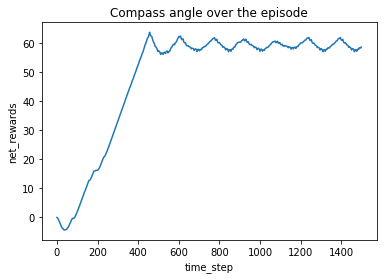

In [0]:
# start game
env = gym.make('MineRLNavigateDense-v0')
obs = env.reset()
done = False
net_reward = 0


angles = []
net_reward = 0
net_rewards = []
while not done and len(angles) < 1500:
    # take the noop action for each step
    action = env.action_space.noop()
    
    # always jump, forward, and attack, also minimize the Angle.
    action['camera'] = [0, 0.03*obs["compassAngle"]]
    action['back'] = 0
    action['forward'] = 1
    action['jump'] = 1
    action['attack'] = 1
    
    obs, reward, done, info = env.step(action)
    
    angles.append(obs["compassAngle"])
    net_reward += reward
    net_rewards.append(net_reward)

time_step = np.arange(0, len(angles))
plt.title("Compass angle over the episode") 
plt.xlabel("time_step") 
plt.ylabel("angle") 
plt.plot(time_step, angles) 
plt.show()

plt.title("Compass angle over the episode") 
plt.xlabel("time_step") 
plt.ylabel("net_rewards") 
plt.plot(time_step, net_rewards) 
plt.show()